<a href="https://colab.research.google.com/github/Audeon/fastai_Notebooks/blob/main/Chapter_3_Digit_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit identification project

In this project we are going to use basic digit identification of 3, and 7. We will use the MNIST dataset in this case. 

I have split the notbook up into sections to make it easier for me to reference in the future. This doesnt really refelct the breakup in the book. Covers points i find most useful.

# Imports

In [83]:
!pip install -q fastai --upgrade
!pip install -q fastbook --upgrade

In [84]:
from fastbook import *
from fastai import *
from fastai.vision.all import *


# Getting the MNIST dataset and turning it into tensors
In this section we are going to get the MNIST dataset, do some experimenting on it, including turning them into tensors and visualizing those tensors the way the computer does.

First we will get the MNIST dataset and untar it into the path variable.

In [85]:
path = untar_data(URLs.MNIST)

We can use the LS command with any paths we create using untar to see what is in that directory. We can also view the subdirectories, as seen in the second block of code here.

In [86]:
 path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [87]:
sevens = (path/'training'/'7').ls().sorted()
threes = (path/'training'/'3').ls().sorted()

Now that we have all of the datasets untarred and in useful arrays lets work display a few of them.

In [88]:
img3_path = threes[242]
im3 = Image.open(img3_path)
im3

In [89]:
img3_path = threes[1]
im3 = Image.open(img3_path)
im3

For us to do any work on the images of course they need to be converted to a tensor or an array. Here we have an example of each. Notice in the second example we used the 4:10 to indicate we want rows from indext 4 to index 10 and the same for the columns. 

In [90]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [91]:
tensor(im3)[4:15, 4:22]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0,   0,   0],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0,   0,   0],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0,   0,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2,   0,   0],


We can use panads Dataframe to color code each of the tensor cells on a gradiant. 

In [92]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


# Pixel Similarity - Start
In this section we are going to discuss and start working through pixel similarity. This work will also cover the next few sections.



---


**Chapter 3: Stop and Think: How might a computer be able to recognize these two digits? What kinds of features might it beable to look at? How might it be able to idenfity these features? How could it combine them?**

My Answers: I sort of understand the method behind this. One of the featurs we will be looking at are the edges. EG in the above example we see that there is a curve, well one curve in the upper right quadrant might indicate a 0, 8, 7, 4, 3, 2. Next we will look at the lower right quadrant, where see the curve from the above zone peak in and then come back out toward the bottom and out of frame. This feature (the curve) narrows down the possibilities to 8,3 more or less. By breaking down the numbers into individual elements and then building them back up into their full self we can easily build filters around those features. 


---


First we are going to try Pixel Similarity. We will find the average value of every pixel of the 3s and 7s. This will give us what an "idea" 3 and 7 would look like. This should allow us to identify the difference between 7 and 3. 

First lets put all the images into a single tensor. This cool trick is called a List Comprehension. Essentally it looks like this
`new_list = [f(o) for o in a_list if o>]` This is a much more efficent way to make new lists than the typical larger loops. 

In [93]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]

In [94]:
three_tensors = [tensor(Image.open(o)) for o in threes]

In [95]:
len(three_tensors), len(seven_tensors)

(6131, 6265)

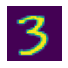

In [96]:
show_image(three_tensors[1])

Now since we are going to get the average pixel density for each of the images in order to build our prediction, we need to stack. PyTorch comes with a handy dandy stack function that allows this to happen. This stacking will create what is called a rank 3 tensor. This act of stacking various tensors is very useful for performing various actions on large datasets. So building these rank 3 tensors is important. 

Also some important information to remember. Rank is the number of axes or dimensions in a tensor. Shape is the size of each of the axis of the tensor. For example when we stack these tensors we will have 3 dimensions: Number of images (6265), size of image width (28), size of image height (28). You cans ee this using the tensor.shape call. The length of the shape is the rank. eg:
```rank = len(tensor.shape)```

Dimension can sometimes be used for the size of an axis (space is three dimensional) where other times it is used for the rank or number of axes (a two dimenional matrix). It can be useful to break down terms into ranks, axis, and length. 


In [97]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [98]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [99]:
len(stacked_threes.shape)

3

And of course since this is a whole fancy framework we can get the tensors rank directly with ```tensor.ndim``` as shown below.

In [100]:
stacked_threes.ndim

3

Now we that we have rank 3 stacked tensors we can calculate the mean along dimension 0 of the tensor.... that is the this is the dimension that indexes over all the images. This will give us the "idea" image for each number. That is if most of the pixels in any future image match this idea image of these numbers than there is a high likelyhood that the image will be which ever it matchs. 

(torch.Size([28, 28]),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f92830b20d0>)

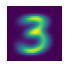

In [101]:
mean3 = stacked_threes.mean(0)

mean3.shape, show_image(mean3)

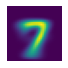

In [102]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

# Mean Absoulte Difference & Root Mean Squared Error
In this section we start to explore how to find the difference between our idea image and our sample.


---
**Chapter 3: Stop And Think - How would you calculate how similar a particular image is to each of our ideal digits?**


In [103]:
a_3 = stacked_threes[1]
a_7 = stacked_sevens[1]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f92809ddb10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9280e40290>)

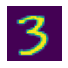

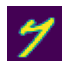

In [104]:
show_image(a_3), show_image(a_7)

In order to find the difference between any random 3 and our "idea" image of a 3, we have a few options.

First we have the Mean Absoulte Difference or L1 Norm, which takes the mean of the absolute value of the differences. 

In [105]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_7_abs = (a_3 - mean7).abs().mean()

dist_3_abs, dist_7_abs

(tensor(0.1114), tensor(0.1586))

Next we have the Root Mean Squared Error (RMSE) or L2 Norm, takes the mean of the square of the differences (this makes it all positive) and then take the square root (this undoes the squaring). 

In [106]:
dist_3_sq = ((a_3 - mean3)**2).mean().sqrt()
dist_7_sq = ((a_3 - mean7)**2).mean().sqrt()
dist_3_sq, dist_7_sq

(tensor(0.2021), tensor(0.3021))

And Pytorch gives you a quick and easy function to use the L1 or L2 Norm. 

In [107]:
F.l1_loss(a_3, mean3), F.l1_loss(a_3, mean7)

(tensor(0.1114), tensor(0.1586))

In [108]:
F.mse_loss(a_3, mean3), F.mse_loss(a_3, mean7)

(tensor(0.0408), tensor(0.0913))

---
# Tensor/Array Experiments
Okay lets take a few mins and review how to set up arrays and tensors using pytorch and numpy. The big thing to keep in mind about the differences is that arrays can be jaggaed, that is each in multi-dimensional array (matrix) the inner arrays may be differnet sizes. These arrays can also have various types with in the data structure. Arrays can not live on the GPU as they are not optimized for that type of computation, due to the features above.

Tensors on the other hand must be a perfect retangle data structure. That is they cannot be jaggaed. Additionally, tensors have strict types which is the basic numerical type. This has the usefulness of allowing them to run on the GPU and proccessa a lot more quickly. Most operations that can be run on numpy arrays will also work on pytorch tensors. 

In [109]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

Like arrays, Tensors are zero indexed. The remainder of testing will be on tensor only but the array syntax is essentially identical. Tensors are the key component to ML. 

In [110]:
tns[1], tns[0], arr[0], arr[1]

(tensor([4, 5, 6]), tensor([1, 2, 3]), array([1, 2, 3]), array([4, 5, 6]))

With tensors and arrays you will often refer to the dimensions as axes. In this example we use the : to indicate everything on the 1st and 2rd axes.

In [111]:
tns[:,1], tns[:,2]

(tensor([2, 5]), tensor([3, 6]))

You can use python slicing to select parts of the tensor as below.

In [112]:
tns[1,0:3], tns[1,0:2]

(tensor([4, 5, 6]), tensor([4, 5]))

Addition, Subtraction, Mutplication, and divison using standard signs also work well on them. Tensors have a type and will also automatically change from int to float as we see below.

In [113]:
tns.type()

'torch.LongTensor'

In [114]:
tns+1,tns-1

(tensor([[2, 3, 4],
         [5, 6, 7]]), tensor([[0, 1, 2],
         [3, 4, 5]]))

In [115]:
tns*4, tns*4/2

(tensor([[ 4,  8, 12],
         [16, 20, 24]]), tensor([[ 2.,  4.,  6.],
         [ 8., 10., 12.]]))

Thus ends our tinkering on how Tensors and Arrays work. Any more experiments should be conducted above this line. 


---



# Computing Matrics using Broadcasting
When encountering an operation between tensors of different differnt ranks (`len(tensor.shape)` or `tensor.ndim`), pytorch will use a method called broadcasting to extend the smaller ranked tensor into the same size as the larger ranked tensor. This allows various types of matrix operations to be efficently done with pytorch and numpy. Broadcasting is an important thing to keep in mind when creating efficent code. 

In this section we will start to see how that works.

First lets get tensors of our validation set, lets cheat and use our testing set vs finding and splling out the validation set from the training set.

In [116]:
val_sevens_tns = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'7').ls()])
val_sevens_tns = val_sevens_tns.float()/255
val_threes_tns = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'3').ls()])
val_threes_tns = val_threes_tns.float()/255
val_sevens_tns.shape, val_threes_tns.shape

(torch.Size([1028, 28, 28]), torch.Size([1010, 28, 28]))

We want to eventually want to create a function "is_3" that can take any image and determine its distance from the idea image. In order to do this we need to define the notion of *distance*. Which is basically going to be a function that calculates the distance between two images. We will use the mean absoulte error for this.

Its important to note here that we are subtracting a-b and getting the absolute value, and then the mean((-1, -2)). Notice the dimensional indexing done here. What order we read each dimension. 

  https://stackoverflow.com/questions/59704538/what-is-a-dimensional-range-of-1-0-in-pytorch

  https://stackoverflow.com/questions/59702785/what-does-dim-1-or-2-mean-in-torch-sum

In [117]:
def mnist_distance(a,b): return (a-b).abs().mean((-1, -2))

In [118]:
mnist_distance(a_3, mean3)

tensor(0.1114)

In [119]:
mean3.shape, val_threes_tns.shape

(torch.Size([28, 28]), torch.Size([1010, 28, 28]))

In [120]:
val_three_dist = mnist_distance(val_threes_tns, mean3)
val_three_dist, val_three_dist.shape, val_three_dist.type()

(tensor([0.1379, 0.1191, 0.1485,  ..., 0.1206, 0.1358, 0.1197]),
 torch.Size([1010]),
 'torch.FloatTensor')

Here is another example of broadcasting more specifically spelled out. Notice the rank of each of the tesnsors, and then when we subtract the larger tensor from the smaller tensor.  One thing to keep in mind when using these broadcasting is that pytorch is not actually creating 1010 additional copies of the data to increase the size its tensor to match the larger. Its not actually allocating memory. Its simply doing some tricky math in the background to accomplis hthis. 

In [121]:
len(val_threes_tns.shape), len(mean3.shape), len((val_threes_tns-mean3).shape)

(3, 2, 3)

# Finishing up Pixel Similarity
In this section we will create our is_3 function and do some testing on it, then we will calculate our accuracy! 

Now lets make the is_3 function. Well use mnist distance function to determine if the distance between the digit in question and the idea 3 is less than the distance to the idea 7, then its a 3. 

In [122]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

Now lets test it with our two example data points.

In [123]:
is_3(a_3),is_3(a_3).float(), is_3(a_7), is_3(a_7).float()

(tensor(True), tensor(1.), tensor(False), tensor(0.))

And thanks to broadcasting, we can actually test this on our entire test range of 3s, and 7s.

In [124]:
is_3(stacked_threes),is_3(stacked_sevens)

(tensor([True, True, True,  ..., True, True, True]),
 tensor([False, False, False,  ..., False, False, False]))

In [125]:
accuracy_3s = is_3(val_threes_tns).float().mean()
accuracy_7s = (1-is_3(val_sevens_tns).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# Stochastic Gradient Descent
 Gradient Descent gives us the ability to turn out simple pixel similarity into a proper machine learning algorithm. Remember Arthur Samuel describes machine learning... *Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in therms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance.* 

 Gradeient Descent provides that method. 

1.   ***Initialize*** the Weights
2.   For each image, use the weights to ***predict*** wheather it appears to be a 3 or 7.
3.  Based on the predictions, calculate how well the model did (***loss***)
5. Calculate the ***gradient*** which measures for each weight how changing that weight would change the loss.
5. ***Step*** (that is change) all the weights based on that loss calculation. 
6. Go back to step 2 and ***repeat*** the process.
7. Iterate until you decide to ***stop*** the training process (for instances because the model is good enough or you dont want to wait any longer)




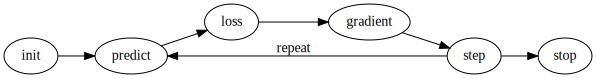

In [126]:
#@title 7 steps to gradient descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## End to End - SGH Example
Here we will go through each of the 7 steps of gradient descent in a end to end example using some synthetic data. Consider you are measuring the pssed of a roller coaster as it went over the top of a hump. Here is an example of that data. With the random noise added into the data, its difficult to tell answer the question "What was the roller coasters speed?"

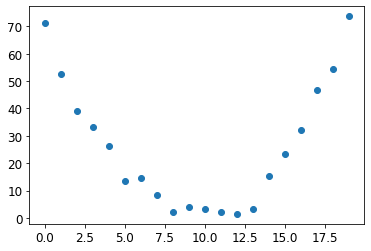

In [127]:
time = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

Instead of guessing every function, we can use a quadratic equation: `a*(time**2)+(b*time)+c` which we can turn into a function.  Using this forumla we can find a quadratic function that best fits this data. 

In [128]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In order to train all the weights though we need to define what "best" in this case means. We define that by choosing a ***loss function***, which returns a value based on its prediction and a target. It is common for continuous data to use the ***mean squared error***:

In [129]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

### Step 1: Initialize the parameters 
First we are going to initalize all the parameters to random values and tell pytorch we want to track the gradients

In [130]:
params = torch.randn(3).requires_grad_()

### Step 2: Calculate the predictions
Next we calculate the predictions and lets graph our predictions and see how close they are.

In [131]:
preds = f(time, params)

In [132]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300,100)

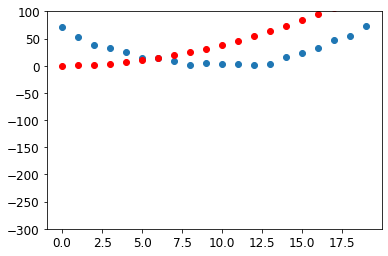

In [133]:
show_preds(preds)

### Step 3: Calculate the loss
We calculate the lose using MSE.

In [134]:
loss = mse(preds, speed)
loss

tensor(46.4939, grad_fn=<SqrtBackward0>)

### Step 4: Calculate the Gradients

In [135]:
loss.backward()
params.grad

tensor([139.7532,   9.0661,   0.4327])

In [136]:
params.grad * 5e-4

tensor([0.0699, 0.0045, 0.0002])

In [137]:
params

tensor([ 0.3512,  0.2927, -0.0061], requires_grad=True)

### Step 5: Step the Weights

In [138]:
lr = 5e-4
params.data -= lr * params.grad.data
params.grad = None

Let see if loss has imporved

In [139]:
preds = f(time,params)
mse(preds,speed)

tensor(37.2598, grad_fn=<SqrtBackward0>)

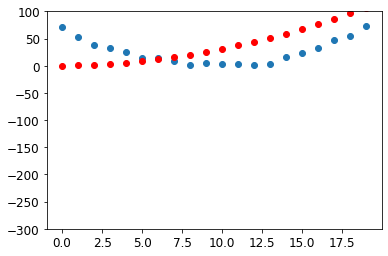

In [140]:
show_preds(preds)

In [141]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds

### Step 6: Repeat the process

Running this mutiple times allows it to lower its loss furthur and furthur.

In [142]:
epochs = 0

In [143]:
for i in range(10): 
  apply_step(params)
  epochs += i

37.25983810424805
30.680667877197266
27.24912452697754
26.07282829284668
25.784162521362305
25.7226505279541
25.709980010986328
25.70734977722168
25.706758499145508
25.706584930419922


In [144]:
epochs

45

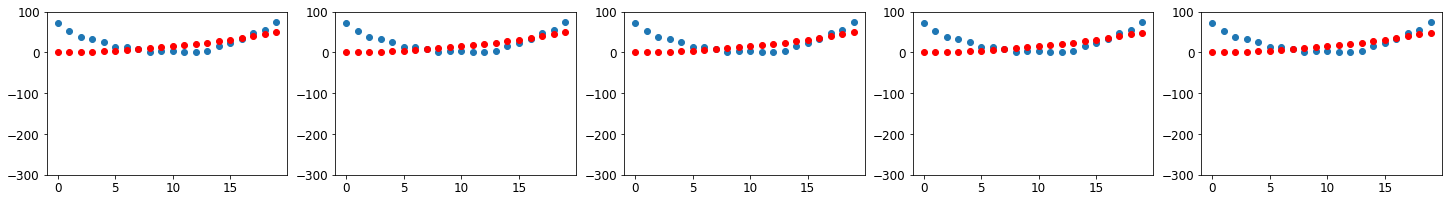

In [145]:
_,axs = plt.subplots(1,5,figsize=(25,3))
for ax in axs: show_preds(apply_step(params, False), ax)

### Step 7: Stopping.
Stoping the repeat when the loss stops going down, as you can see happened above near the 4000ths iteration.

# MNIST Loss Function
Four our example, we have our X's which are the individual pictures in the dataset. Next we will combine them all into a single tensor and transform them into a rank 2 tensor. This is accomplished by using the view method which changes the shape of a tensor with out changing the contents. -1 is a parameter for view that means "make this axis as big as necessary to fit all the data".

## Data prep

In [146]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [147]:
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

Getting the dataset into a tuple of (x,y) using pythons zip function.

In [148]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

Now do the above steps for the validation set. 

In [149]:
valid_x = torch.cat([val_threes_tns, val_sevens_tns]).view(-1, 28*28)
valid_y = tensor([1]*len(val_threes_tns) + [0]*len(val_sevens_tns)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

## Parameter Initialization 

Now lets ***initalize*** a random weight for every pixel. 

In [150]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [151]:
weights = init_params((28*28,1))

The function weights\*pixels will be equal to 0 when pixels are equal to 0 (i.e its intercept is 0). This is not really flexiable enough since `y=w*x+b` is the forumla for a line, and we still need the b. So lets assign the bias a random number as well. The Weights in the equation are w, the bias is b and x is the image.

In [152]:
bias = init_params(1)

Now lets calculate the prediction for one image.

In [153]:
(train_x[0]*weights.T).sum()+bias

tensor([15.6935], grad_fn=<AddBackward0>)

Now we will create a function for some matrix multiplication. In python matrix mutplication is represented by @. So the below is actually `xb*weights + bias`

In [154]:
def linear1(xb): return xb@weights + bias

In [155]:
preds - linear1(train_x)

tensor([[-15.6998, -15.1303, -13.9981,  ...,  70.5040,  80.6388,  91.3362],
        [-13.2996, -12.7301, -11.5979,  ...,  72.9042,  83.0390,  93.7364],
        [-12.8518, -12.2823, -11.1501,  ...,  73.3520,  83.4868,  94.1842],
        ...,
        [ -4.8939,  -4.3244,  -3.1922,  ...,  81.3099,  91.4446, 102.1421],
        [ 12.9362,  13.5058,  14.6379,  ...,  99.1401, 109.2748, 119.9722],
        [ 13.7480,  14.3175,  15.4497,  ...,  99.9518, 110.0866, 120.7840]], grad_fn=<SubBackward0>)

In [156]:
preds

tensor([-6.3434e-03,  5.6318e-01,  1.6954e+00,  3.3902e+00,  5.6477e+00,  8.4679e+00,  1.1851e+01,  1.5796e+01,  2.0304e+01,  2.5375e+01,  3.1009e+01,  3.7205e+01,  4.3964e+01,  5.1285e+01,
         5.9169e+01,  6.7616e+01,  7.6625e+01,  8.6197e+01,  9.6332e+01,  1.0703e+02], grad_fn=<AddBackward0>)

Now lets check the accuracy. To decide if output is a 3 or a 7 we simply need to check to see if its greater than 0. Using broadcasting we can check the entire dataset with out looping, as follows.

In [157]:
corrects = (preds > 0.0).float() == train_y

In [158]:
corrects

tensor([[False,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ...,  True,  True,  True],
        ...,
        [ True, False, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False]])

In [159]:
acc = corrects.float().mean().item()
acc

0.49513551592826843

Now change a weight to see how it impacts accuracy. We will run through these weight changes twice to see what happens...

In [160]:
weights.data[0] *= 1.0001

In [161]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.8438205718994141

You can see that after the second pass there is no change in the accuracy. This is because we need gradients in order to improve our model using SGD. In order to calculate the gradients we need to have defined a ***loss function***! Remember gradients are a mesure of how the loss function changes based on small changes to the weights. 

## Loss Function V1

>>**Math Info:** Accuracy is a function that is constant almost everywhere (excapt at the threshold, 0.5), so its derivative is nil almost everywhere (and infinity at the threshold). This then gives gradients that are 0 or infinate which are usless for updating the model.



The purpose of the loss function is to measure the difference between the predicted value and the true values. As you can see we pass in the tensors for the prediction (hypothesis) and the target (labels)

In [205]:
def mnist_loss(prediction, targets):
  return torch.where(targets==1, 1-prediction, prediction).mean()

### torch.where()
Here we are going to talk about there `torch.where()` function and its use as part of the loss function. This is essentially the same as running 
`[b[i] if a[i] else c[i] for i in range(len(a))]` but it can run at cuda speed on tensors. What this does is measure the distance each prediction is from 1 if it should be 1 and distance from 0 if it should be 0.




In [206]:
trgts = tensor([1,0,1])
prds = tensor([0.900, 0.400, 0.200])

In [207]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

What the above loss function does is take this distance, and give us the mean value of it since we need a scalar (1D tensor) to determine the gradients and what changes need to be made to the weights.. 

In [208]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [209]:
mnist_loss(tensor([0.9,0.4,0.8]), trgts)

tensor(0.2333)

You can find more info by using the help function like below.

In [210]:
help(torch.where)

Help on built-in function where:

where(...)
    where(condition, x, y) -> Tensor
    
    Return a tensor of elements selected from either :attr:`x` or :attr:`y`, depending on :attr:`condition`.
    
    The operation is defined as:
    
    .. math::
        \text{out}_i = \begin{cases}
            \text{x}_i & \text{if } \text{condition}_i \\
            \text{y}_i & \text{otherwise} \\
        \end{cases}
    
    .. note::
        The tensors :attr:`condition`, :attr:`x`, :attr:`y` must be :ref:`broadcastable <broadcasting-semantics>`.
    
    .. note::
        Currently valid scalar and tensor combination are
        1. Scalar of floating dtype and torch.double
        2. Scalar of integral dtype and torch.long
        3. Scalar of complex dtype and torch.complex128
    
    Arguments:
        condition (BoolTensor): When True (nonzero), yield x, otherwise yield y
        x (Tensor or Scalar): value (if :attr:`x` is a scalar) or values selected at indices
                       

## Sigmoid Function
One problem with the above loss function is it requires a value between 0 and 1 to work. In this part I will look at the sigmoid function, and how to use it with this loss function. 

A sigmoid can be defined using the following function

In [211]:
def sigmoid(x): return 1/(1+torch.exp(-x))

But this is unnessicary as pytorch has a built in sigmoid function that works at cuda speed. Lets plot what a sigmoid looks like using that. 

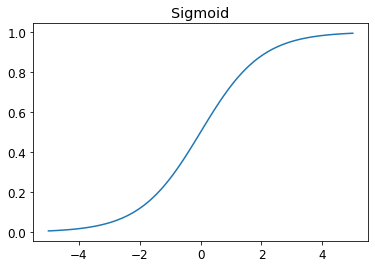

In [213]:
plot_function(torch.sigmoid, title='Sigmoid', min=-5, max=5)

AS you can see, a sigmoid function takes any input value and smushes it between 0 and 1. Its also a smooth curve which makes it easier for SGD to find gradients. 

## Updated mnist_loss function
We will modify our mnist_loss function to put the predictions through a sigmoid before running them through the where function.

In [214]:
def mnist_loss(prediction, targets):
  prediction = prediction.sigmoid()
  return torch.where(targets==1, 1-prediction, prediction).mean()

##Metrics vs Loss


One important difference to understand is the difference between metric and loss. Metrics are for humans and loss is to drive the automated learning. The loss function must have meaningful derivatives that produce a smooth curve with no large flat sections and no big jumps. This is why its important to make a loss function that responds to small changes in the confidence level. The loss function is calculated on each item in our data set and the loss values are all averaged and the mean is reported at the end of each epoch. 

Metrics are the numbers that we care about. They are the values that are preinted at the end of each epoch that tell us how the model is doing. You should focus on these metrics vs the loss because these metrics are more meaningful performance of the model.

## SGD and Mini-Batchs